In [702]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [703]:
bb_KNN = pd.read_csv("./Resources/kmeans_data_comb.csv")
# bb_KNN = bb_KNN.loc[(bb_KNN['Offensive Player']==0)]

In [704]:
bb_KNN.head()

,Assists per Game,Blocks per Game,Full Name,GP per Year,Last Year,MVP,Offensive Player,Points per Game,Rebounds per Game,Starting Year,Steals per Game,Year Inducted,Years Retired,Years to Induct,playerID,pos
0,2.531100,0.763158,Julius Shareef Abdur-Rahim,69.666667,2007,0,1,18.041866,7.497608,1996,0.983254,NaN,4.0,NaN,abdursh01,F
1,2.587750,0.462898,Nelison Anderson,65.307692,2001,0,1,14.338045,5.067138,1989,1.396938,NaN,10.0,NaN,anderni01,F-G
2,1.355612,0.235813,Shandon Rodriguez Anderson,79.300000,2005,0,0,7.170240,3.081967,1996,0.740227,NaN,6.0,NaN,andersh01,F-G
3,3.761350,0.112922,Gregory Carleton Anthony,78.090909,2001,0,0,6.928987,1.793946,1991,1.128056,NaN,10.0,NaN,anthogr01,G
4,1.541744,0.307050,Stacey Orlando Augmon,71.866667,2005,0,0,7.840445,3.149351,1991,0.955473,NaN,6.0,NaN,augmost01,G-F


In [705]:
data = bb_KNN.drop(['Full Name','Last Year','MVP','Years to Induct','pos','Offensive Player','Starting Year','Years Retired'] ,axis=1)

In [706]:
data['YI'] = data[['Year Inducted']].sum(axis=1)>0
# data['YI'] = data['YI'] *1
y = data['YI'].values.reshape(-1, 1)
# label_encoder = LabelEncoder()
# label_encoder.fit(y)
# encoded_y = label_encoder.transform(y)
data = data.drop(['YI','Year Inducted','playerID'] ,axis=1)
data.head()


,Assists per Game,Blocks per Game,GP per Year,Points per Game,Rebounds per Game,Steals per Game
0,2.531100,0.763158,69.666667,18.041866,7.497608,0.983254
1,2.587750,0.462898,65.307692,14.338045,5.067138,1.396938
2,1.355612,0.235813,79.300000,7.170240,3.081967,0.740227
3,3.761350,0.112922,78.090909,6.928987,1.793946,1.128056
4,1.541744,0.307050,71.866667,7.840445,3.149351,0.955473


In [707]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,y, random_state=42)
X_train.head()

,Assists per Game,Blocks per Game,GP per Year,Points per Game,Rebounds per Game,Steals per Game
15,0.865150,1.134037,76.937500,7.803412,7.876523,0.625508
44,1.066477,0.294397,81.000000,8.454891,3.647673,0.529915
89,1.883510,2.418306,77.764706,20.898638,9.865356,0.951589
90,6.142702,0.072985,70.615385,19.071895,5.986928,0.776688
9,1.476151,1.003347,79.666667,8.892887,7.622594,0.819247


In [708]:
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

In [709]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train.ravel())
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.929
k: 3, Train/Test Score: 0.940/0.929
k: 5, Train/Test Score: 0.892/0.893
k: 7, Train/Test Score: 0.880/0.857
k: 9, Train/Test Score: 0.855/0.857
k: 11, Train/Test Score: 0.819/0.821
k: 13, Train/Test Score: 0.843/0.821
k: 15, Train/Test Score: 0.843/0.857
k: 17, Train/Test Score: 0.819/0.857
k: 19, Train/Test Score: 0.807/0.857


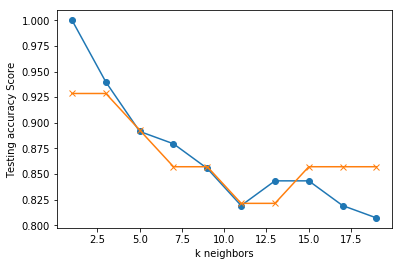

In [712]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig("./Resources/Images/KNN.png", bbox_inches="tight")
plt.show()


In [722]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train.ravel())
print('k=3 Test Acc: %.3f' % knn.score(X_test, y_test))

k=3 Test Acc: 0.857


In [723]:
predicted_class = knn.predict(data)

In [724]:
predicted_class

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
        True,  True, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True])

In [725]:
print(predicted_class)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False  True False False  True False False False
 False False False False False False False False False False False False
  True False False False False False False  True False  True  True False
 False  True  True  True  True  True False  True  True  True  True  True
  True  True False  True  True  True  True  True  True False  True  True
  True  True  True]


In [726]:
bb_KNN['Hall of Fame']=predicted_class

In [727]:
# bb_KNN.to_csv("./Resources/hof_predict_sample.csv", sep=',', index=False)

In [728]:
bb_KNN_sample = pd.read_csv("./Resources/knn_test_data.csv")
# bb_KNN_sample = bb_KNN_sample.loc[(bb_KNN_sample['Offensive Player']==0)]

In [673]:
bb_KNN_sample.head()

,Assists per Game,Blocks per Game,Full Name,GP per Year,Last Year,MVP,Offensive Player,Points per Game,Rebounds per Game,Starting Year,Steals per Game,Year Inducted,Years Retired,Years to Induct,playerID,pos
0,2.531100,0.763158,Julius Shareef Abdur-Rahim,69.666667,2007,0,1,18.041866,7.497608,1996,0.983254,NaN,4.0,NaN,abdursh01,F
1,2.587750,0.462898,Nelison Anderson,65.307692,2001,0,1,14.338045,5.067138,1989,1.396938,NaN,10.0,NaN,anderni01,F-G
2,1.355612,0.235813,Shandon Rodriguez Anderson,79.300000,2005,0,0,7.170240,3.081967,1996,0.740227,NaN,6.0,NaN,andersh01,F-G
3,3.761350,0.112922,Gregory Carleton Anthony,78.090909,2001,0,0,6.928987,1.793946,1991,1.128056,NaN,10.0,NaN,anthogr01,G
4,1.541744,0.307050,Stacey Orlando Augmon,71.866667,2005,0,0,7.840445,3.149351,1991,0.955473,NaN,6.0,NaN,augmost01,G-F


In [674]:
bb_KNN_sample_clean=bb_KNN_sample.drop(['Full Name','Last Year','MVP','Year Inducted','Years Retired','Years to Induct','playerID','pos','Offensive Player','Starting Year'], axis=1)

In [675]:
bb_KNN_sample_clean.head()

,Assists per Game,Blocks per Game,GP per Year,Points per Game,Rebounds per Game,Steals per Game
0,2.531100,0.763158,69.666667,18.041866,7.497608,0.983254
1,2.587750,0.462898,65.307692,14.338045,5.067138,1.396938
2,1.355612,0.235813,79.300000,7.170240,3.081967,0.740227
3,3.761350,0.112922,78.090909,6.928987,1.793946,1.128056
4,1.541744,0.307050,71.866667,7.840445,3.149351,0.955473


In [676]:
predicted_class_sample = knn.predict(bb_KNN_sample_clean)

In [677]:
bb_KNN_sample['Hall of Fame']=predicted_class_sample

In [678]:
bb_KNN_sample.head()

,Assists per Game,Blocks per Game,Full Name,GP per Year,Last Year,MVP,Offensive Player,Points per Game,Rebounds per Game,Starting Year,Steals per Game,Year Inducted,Years Retired,Years to Induct,playerID,pos,Hall of Fame
0,2.531100,0.763158,Julius Shareef Abdur-Rahim,69.666667,2007,0,1,18.041866,7.497608,1996,0.983254,NaN,4.0,NaN,abdursh01,F,False
1,2.587750,0.462898,Nelison Anderson,65.307692,2001,0,1,14.338045,5.067138,1989,1.396938,NaN,10.0,NaN,anderni01,F-G,False
2,1.355612,0.235813,Shandon Rodriguez Anderson,79.300000,2005,0,0,7.170240,3.081967,1996,0.740227,NaN,6.0,NaN,andersh01,F-G,False
3,3.761350,0.112922,Gregory Carleton Anthony,78.090909,2001,0,0,6.928987,1.793946,1991,1.128056,NaN,10.0,NaN,anthogr01,G,False
4,1.541744,0.307050,Stacey Orlando Augmon,71.866667,2005,0,0,7.840445,3.149351,1991,0.955473,NaN,6.0,NaN,augmost01,G-F,False


In [679]:
bb_KNN_sample.to_csv("./Resources/hof_predict_sample.csv", sep=',', index=False)

In [680]:
bb_KNN_2013 = pd.read_csv("./Resources/BB_clean_2013.csv")

In [681]:
bb_KNN_2013.head()

,playerID,Total GP,Total Points,Starting Year,Last Year,Full Name,Year Inducted,GP per Year,Minutes per Game,Points per Game,O. Rebounds per Game,D. Rebounds per Game,Rebounds per Game,Assists per Game,Steals per Game,Blocks per Game,Turnovers per Game,PF per Game,Years Retired
0,abdursh01,915,16412,1997,2008,Julius Shareef Abdur-Rahim,0.0,76.250000,34.498361,17.936612,2.249180,5.267760,7.516940,2.495082,0.970492,0.737705,2.535519,2.782514,5
1,anderde01,658,7706,1998,2008,Derek Lamont Anderson,0.0,59.818182,28.908815,11.711246,0.700608,2.537994,3.238602,3.319149,1.085106,0.141337,1.680851,2.018237,5
2,anderke01,1092,13160,1992,2005,Kenneth Anderson,0.0,78.000000,29.256410,12.051282,0.757326,2.206960,2.964286,5.876374,1.416667,0.119963,1.998168,2.271062,8
3,andersh01,785,5582,1997,2006,Shandon Rodriguez Anderson,0.0,78.500000,21.805096,7.110828,0.794904,2.317197,3.112102,1.371975,0.759236,0.247134,1.284076,2.006369,7
4,armstda01,906,7976,1995,2008,Darrell Eugene Armstrong,0.0,64.714286,23.071744,8.803532,0.760486,1.870861,2.631347,3.942605,1.300221,0.116998,1.791391,1.644592,5


In [682]:
bb_KNN=bb_KNN_2013.drop(['Full Name','Last Year','Year Inducted','Years Retired','playerID','Starting Year','Total GP','Turnovers per Game','PF per Game','O. Rebounds per Game','D. Rebounds per Game'], axis=1)

In [683]:
bb_KNN = bb_KNN[['Assists per Game','Blocks per Game','GP per Year','Points per Game','Rebounds per Game','Steals per Game']]

from sklearn.preprocessing import MinMaxScaler
bb_KNN_minmax = MinMaxScaler().fit(bb_KNN)
BB_KNN_scaled = bb_KNN_minmax.transform(bb_KNN)
bb_KNN.head()

,Assists per Game,Blocks per Game,GP per Year,Points per Game,Rebounds per Game,Steals per Game
0,2.495082,0.737705,76.250000,17.936612,7.516940,0.970492
1,3.319149,0.141337,59.818182,11.711246,3.238602,1.085106
2,5.876374,0.119963,78.000000,12.051282,2.964286,1.416667
3,1.371975,0.247134,78.500000,7.110828,3.112102,0.759236
4,3.942605,0.116998,64.714286,8.803532,2.631347,1.300221


In [684]:
predicted_class_2013 = knn.predict(bb_KNN)

In [685]:
bb_KNN_2013['Hall of Fame']=predicted_class_2013

In [686]:
bb_KNN_2013.head()

,playerID,Total GP,Total Points,Starting Year,Last Year,Full Name,Year Inducted,GP per Year,Minutes per Game,Points per Game,O. Rebounds per Game,D. Rebounds per Game,Rebounds per Game,Assists per Game,Steals per Game,Blocks per Game,Turnovers per Game,PF per Game,Years Retired,Hall of Fame
0,abdursh01,915,16412,1997,2008,Julius Shareef Abdur-Rahim,0.0,76.250000,34.498361,17.936612,2.249180,5.267760,7.516940,2.495082,0.970492,0.737705,2.535519,2.782514,5,False
1,anderde01,658,7706,1998,2008,Derek Lamont Anderson,0.0,59.818182,28.908815,11.711246,0.700608,2.537994,3.238602,3.319149,1.085106,0.141337,1.680851,2.018237,5,False
2,anderke01,1092,13160,1992,2005,Kenneth Anderson,0.0,78.000000,29.256410,12.051282,0.757326,2.206960,2.964286,5.876374,1.416667,0.119963,1.998168,2.271062,8,False
3,andersh01,785,5582,1997,2006,Shandon Rodriguez Anderson,0.0,78.500000,21.805096,7.110828,0.794904,2.317197,3.112102,1.371975,0.759236,0.247134,1.284076,2.006369,7,False
4,armstda01,906,7976,1995,2008,Darrell Eugene Armstrong,0.0,64.714286,23.071744,8.803532,0.760486,1.870861,2.631347,3.942605,1.300221,0.116998,1.791391,1.644592,5,False


In [687]:
bb_KNN_2013 = bb_KNN_2013.loc[bb_KNN_2013['Hall of Fame']==True]
bb_KNN_2013.to_csv("./Resources/hof_predict_2014.csv", sep=',', index=False)

In [688]:
bb_KNN_2014 = pd.read_csv("./Resources/BB_clean_2014.csv")

In [689]:
bb_KNN_2014.head()

,playerID,Total GP,Total Points,Starting Year,Last Year,Full Name,Year Inducted,GP per Year,Minutes per Game,Points per Game,O. Rebounds per Game,D. Rebounds per Game,Rebounds per Game,Assists per Game,Steals per Game,Blocks per Game,Turnovers per Game,PF per Game,Years Retired
0,abdursh01,915,16412,1997,2008,Julius Shareef Abdur-Rahim,0.0,76.250000,34.498361,17.936612,2.249180,5.267760,7.516940,2.495082,0.970492,0.737705,2.535519,2.782514,6
1,alstora01,800,8126,2000,2010,Rafer Jamel Alston,0.0,72.727273,29.075000,10.157500,0.366250,2.442500,2.808750,4.730000,1.213750,0.156250,1.787500,2.057500,4
2,anderde01,658,7706,1998,2008,Derek Lamont Anderson,0.0,59.818182,28.908815,11.711246,0.700608,2.537994,3.238602,3.319149,1.085106,0.141337,1.680851,2.018237,6
3,anderke01,1092,13160,1992,2005,Kenneth Anderson,0.0,78.000000,29.256410,12.051282,0.757326,2.206960,2.964286,5.876374,1.416667,0.119963,1.998168,2.271062,9
4,andersh01,785,5582,1997,2006,Shandon Rodriguez Anderson,0.0,78.500000,21.805096,7.110828,0.794904,2.317197,3.112102,1.371975,0.759236,0.247134,1.284076,2.006369,8


In [690]:
bb_KNN=bb_KNN_2014.drop(['Full Name','Last Year','Year Inducted','Years Retired','playerID','Starting Year','Total GP','Turnovers per Game','PF per Game','O. Rebounds per Game','D. Rebounds per Game'], axis=1)

In [691]:
bb_KNN = bb_KNN[['Assists per Game','Blocks per Game','GP per Year','Points per Game','Rebounds per Game','Steals per Game']]
from sklearn.preprocessing import MinMaxScaler
bb_KNN_minmax = MinMaxScaler().fit(bb_KNN)
BB_KNN_scaled = bb_KNN_minmax.transform(bb_KNN)
bb_KNN.head()

,Assists per Game,Blocks per Game,GP per Year,Points per Game,Rebounds per Game,Steals per Game
0,2.495082,0.737705,76.250000,17.936612,7.516940,0.970492
1,4.730000,0.156250,72.727273,10.157500,2.808750,1.213750
2,3.319149,0.141337,59.818182,11.711246,3.238602,1.085106
3,5.876374,0.119963,78.000000,12.051282,2.964286,1.416667
4,1.371975,0.247134,78.500000,7.110828,3.112102,0.759236


In [692]:
predicted_class_2014 = knn.predict(bb_KNN)

In [693]:
bb_KNN_2014['Hall of Fame']=predicted_class_2014

In [694]:
bb_KNN_2014 = bb_KNN_2014.loc[bb_KNN_2014['Hall of Fame']==True]
bb_KNN_2014.to_csv("./Resources/hof_predict_2015.csv", sep=',', index=False)

In [695]:
bb_KNN_2015 = pd.read_csv("./Resources/BB_clean_2015.csv")

In [696]:
bb_KNN_2015.head()

,playerID,Total GP,Total Points,Starting Year,Last Year,Full Name,Year Inducted,GP per Year,Minutes per Game,Points per Game,O. Rebounds per Game,D. Rebounds per Game,Rebounds per Game,Assists per Game,Steals per Game,Blocks per Game,Turnovers per Game,PF per Game,Years Retired
0,abdursh01,915,16412,1997,2008,Julius Shareef Abdur-Rahim,0.0,76.250000,34.498361,17.936612,2.249180,5.267760,7.516940,2.495082,0.970492,0.737705,2.535519,2.782514,7
1,allenma01,587,2866,2002,2011,Malik Allen,0.0,58.700000,15.122658,4.882453,0.974446,1.833049,2.807496,0.494037,0.269165,0.465077,0.652470,1.872232,4
2,alstora01,800,8126,2000,2010,Rafer Jamel Alston,0.0,72.727273,29.075000,10.157500,0.366250,2.442500,2.808750,4.730000,1.213750,0.156250,1.787500,2.057500,5
3,anderde01,658,7706,1998,2008,Derek Lamont Anderson,0.0,59.818182,28.908815,11.711246,0.700608,2.537994,3.238602,3.319149,1.085106,0.141337,1.680851,2.018237,7
4,anderke01,1092,13160,1992,2005,Kenneth Anderson,0.0,78.000000,29.256410,12.051282,0.757326,2.206960,2.964286,5.876374,1.416667,0.119963,1.998168,2.271062,10


In [697]:
bb_KNN=bb_KNN_2015.drop(['Full Name','Last Year','Year Inducted','Years Retired','playerID','Starting Year','Total GP','Turnovers per Game','PF per Game','O. Rebounds per Game','D. Rebounds per Game'], axis=1)

In [698]:
bb_KNN = bb_KNN[['Assists per Game','Blocks per Game','GP per Year','Points per Game','Rebounds per Game','Steals per Game']]
from sklearn.preprocessing import MinMaxScaler
bb_KNN_minmax = MinMaxScaler().fit(bb_KNN)
BB_KNN_scaled = bb_KNN_minmax.transform(bb_KNN)
bb_KNN.head()

,Assists per Game,Blocks per Game,GP per Year,Points per Game,Rebounds per Game,Steals per Game
0,2.495082,0.737705,76.250000,17.936612,7.516940,0.970492
1,0.494037,0.465077,58.700000,4.882453,2.807496,0.269165
2,4.730000,0.156250,72.727273,10.157500,2.808750,1.213750
3,3.319149,0.141337,59.818182,11.711246,3.238602,1.085106
4,5.876374,0.119963,78.000000,12.051282,2.964286,1.416667


In [699]:
predicted_class_2015 = knn.predict(bb_KNN)

In [700]:
bb_KNN_2015['Hall of Fame']=predicted_class_2015

In [701]:
bb_KNN_2015 = bb_KNN_2015.loc[bb_KNN_2015['Hall of Fame']==True]
bb_KNN_2015.to_csv("./Resources/hof_predict_2016.csv", sep=',', index=False)